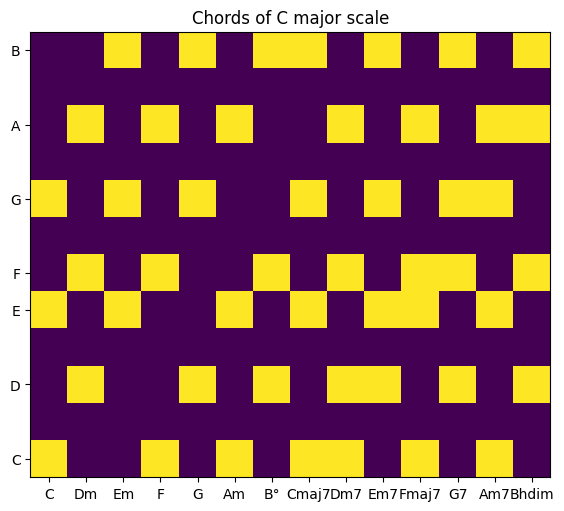

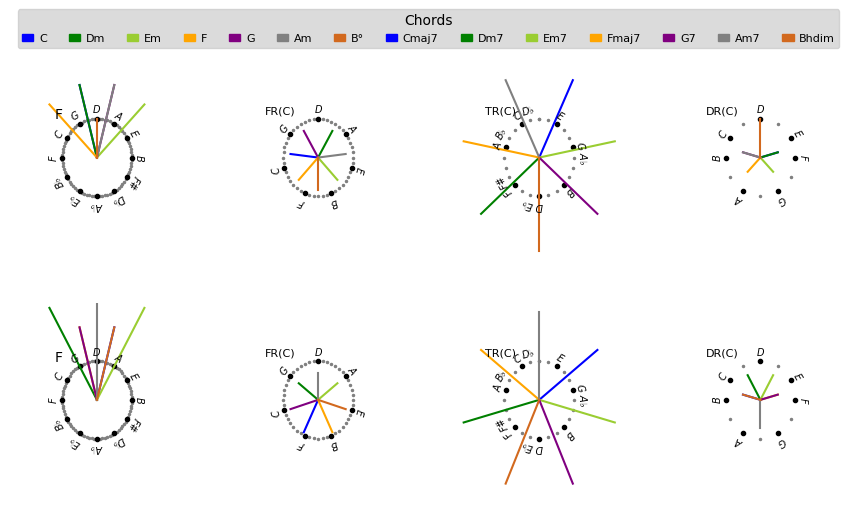

In [2]:
import mir_eval
import numpy as np
import matplotlib.pyplot as plt
import circularPitchSpace as cps
from matplotlib.patches import Patch
from matplotlib.gridspec import GridSpec

def calculateDistance(x1,x2) -> float:
    e = (x1-x2)
    return np.sqrt(e.real**2+e.imag**2)


major = mir_eval.chord.quality_to_bitmap("maj")
minor = mir_eval.chord.quality_to_bitmap("min")
dim = mir_eval.chord.quality_to_bitmap("dim")
aug = mir_eval.chord.quality_to_bitmap("aug")
seventh = mir_eval.chord.quality_to_bitmap("7")
maj7 = mir_eval.chord.quality_to_bitmap("maj7")
min7 = mir_eval.chord.quality_to_bitmap("min7") 
hdim = mir_eval.chord.quality_to_bitmap("hdim7")

C = major
D = np.roll(minor,2)
E = np.roll(minor,4)
F = np.roll(major,5)
G = np.roll(major,7)
A = np.roll(minor,9)
B = np.roll(dim,11)
major_chords = [C,D,E,F,G,A,B]

C = maj7
D = np.roll(min7,2)
E = np.roll(min7,4)
F = np.roll(maj7,5)
G = np.roll(seventh,7)
A = np.roll(min7,9)
B = np.roll(hdim,11)
major_tetrads = [C,D,E,F,G,A,B]
prototypes_list = major_chords+major_tetrads
prototypes = np.array(prototypes_list)
prototype_labels = ["C","Dm","Em","F","G","Am","B°","Cmaj7","Dm7","Em7","Fmaj7","G7","Am7","Bhdim"]
chordlabels = prototype_labels
fig,ax = plt.subplots(figsize=(6,5),layout='constrained')
ax.imshow(prototypes.T,origin = 'lower')
ax.set_yticks([0,2,4,5,7,9,11])
ax.set_yticklabels(["C","D","E","F","G","A","B"])
ax.set_xticks(range(len(chordlabels)))
ax.set_xticklabels(chordlabels)
ax.set_title("Chords of C major scale");

cps_features = cps.transformChroma(prototypes) 
r_F,r_FR,r_TR,r_DR = cps_features
colors = ["blue","green","yellowgreen","orange","purple","grey","chocolate","blue","green","yellowgreen","orange","purple","grey","chocolate"]
labels = chordlabels
legend_handles = [Patch(color=color) for color in colors]
color_dict = dict(zip(chordlabels,colors))
fig,ax = plt.subplots(2,4,figsize=(9,5))
cps.plotCircleOfFifths(ax[0,0])
cps.plotCircleOfFifthsRelated(ax[0,1],0)
cps.plotCircleOfThirdsRelated(ax[0,2],0)
cps.plotCircleOfDiatonicRelated(ax[0,3],0)
cps.plotCircleOfFifths(ax[1,0])
cps.plotCircleOfFifthsRelated(ax[1,1],0)
cps.plotCircleOfThirdsRelated(ax[1,2],0)
cps.plotCircleOfDiatonicRelated(ax[1,3],0)
for t in range(7):
    z = r_F[t]*1j 
    ax[0,0].plot([0,z.real],[0,z.imag],'-',color=colors[t],markersize=2)
    z = r_FR[t,0]*1j
    ax[0,1].plot([0,z.real],[0,z.imag],'-',color=colors[t],markersize=2)
    z = r_TR[t,0]*1j
    ax[0,2].plot([0,z.real],[0,z.imag],'-',color=colors[t],markersize=2)
    z = r_DR[t,0]*1j
    ax[0,3].plot([0,z.real],[0,z.imag],'-',color=colors[t],markersize=2)
for t in range(7,14):
    z = r_F[t]*1j 
    ax[1,0].plot([0,z.real],[0,z.imag],'-',color=colors[t],markersize=2)
    z = r_FR[t,0]*1j
    ax[1,1].plot([0,z.real],[0,z.imag],'-',color=colors[t],markersize=2)
    z = r_TR[t,0]*1j
    ax[1,2].plot([0,z.real],[0,z.imag],'-',color=colors[t],markersize=2)
    z = r_DR[t,0]*1j
    ax[1,3].plot([0,z.real],[0,z.imag],'-',color=colors[t],markersize=2)
plt.subplots_adjust(top=0.8)  # Increase or decrease the value as needed
fig.legend(legend_handles, labels,ncols=len(chordlabels), loc='center', bbox_to_anchor=(0.5, 1), title='Chords', handlelength=1, handletextpad=0.5, fontsize=8, title_fontsize=10, facecolor='lightgray', framealpha=0.8)
plt.tight_layout()
for row in ax:
    for col in row:
        col.set_xlim(-2.5,2.5)
        col.set_ylim(-2.5,2.5)

# Vergleich mit Prototypenvektor
notes = ["C","C#","D","D#","E","F","F#","G","G#","A","A#","B"]
prototype_labels = []
prototypes = np.zeros((12,7,12),dtype=float)
for i in range(12):
    I = np.roll(major,i)
    II = np.roll(minor,i+2)
    III = np.roll(minor,i+4)
    IV = np.roll(major,i+5)
    V = np.roll(major,i+7)
    VI = np.roll(minor,i+9)
    VII = np.roll(dim,i+11)
    prototype_labels.append([f"{notes[i]}",f"{notes[(i+2)%12]}m",f"{notes[(i+4)%12]}m",
                   f"{notes[(i+5)%12]}",f"{notes[(i+7)%12]}",f"{notes[(i+9)%12]}m",f"{notes[(i+11)%12]}°"])
    prototypes[i,:,:] = np.array([I,II,III,IV,V,VI,VII],dtype=float)


AttributeError: module 'circularPitchSpace' has no attribute 'getNumberOfNotesInKey'

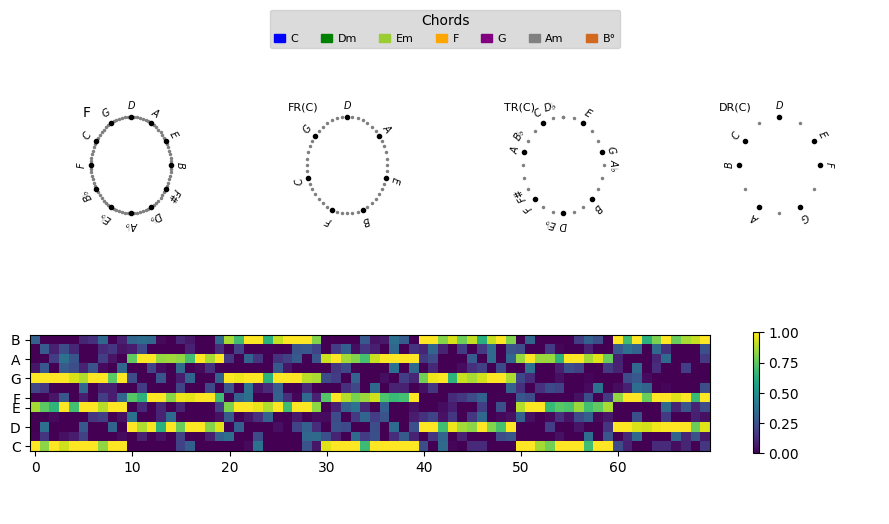

In [3]:
fig,ax = plt.subplots(2,4,figsize=(9,5))
gs = GridSpec(2, 4, figure=fig)
xlim = (-2.5,2.5)
ylim = (-2.5,2.5)
ax0 = fig.add_subplot(gs[0, 0],xlim=xlim,ylim=ylim)
ax1 = fig.add_subplot(gs[0, 1],xlim=xlim,ylim=ylim)
ax2 = fig.add_subplot(gs[0, 2],xlim=xlim,ylim=ylim)
ax3 = fig.add_subplot(gs[0, 3],xlim=xlim,ylim=ylim)
for ax in fig.axes:
    ax.axison = False
ax4 = fig.add_subplot(gs[1, :])
colors = ["blue","green","yellowgreen","orange","purple","grey","chocolate"]
labels = prototype_labels[0] # C-major
legend_handles = [Patch(color=color) for color in colors]
cps.plotCircleOfFifths(ax0)
cps.plotCircleOfFifthsRelated(ax1,0)
cps.plotCircleOfThirdsRelated(ax2,0)
cps.plotCircleOfDiatonicRelated(ax3,0)
plt.subplots_adjust(top=0.8)  # Increase or decrease the value as needed
fig.legend(legend_handles, labels,ncol =7 , loc='center', bbox_to_anchor=(0.5, 1), title='Chords',handlelength=1, handletextpad=0.5, fontsize=8, title_fontsize=10, facecolor='lightgray', framealpha=0.8)


n = 70
wrong_chords = []
chroma = np.zeros((n,12),dtype=float)
chord = mir_eval.chord.quality_to_bitmap("maj") #maj,min,dim,aug
root = 0 # C=0, C#=1 ..
for t in range(n):
    if t < 10:
        chord = mir_eval.chord.quality_to_bitmap("maj") #maj,min,dim,aug
        halftones = root+0 # C
    elif 10 <= t < 20:
        chord = mir_eval.chord.quality_to_bitmap("min") #maj,min,dim,aug
        halftones = root+2 # Dm
    elif 20 <= t < 30:
        chord = mir_eval.chord.quality_to_bitmap("min") 
        halftones = root+ 4 # Em
    elif 30 <= t < 40:
        chord = mir_eval.chord.quality_to_bitmap("maj") #maj,min,dim,aug
        halftones = root+5 # F
    elif 40 <= t < 50:
        chord = mir_eval.chord.quality_to_bitmap("maj") #maj,min,dim,aug
        halftones = root+7 # G
    elif 50 <= t < 60:
        chord = mir_eval.chord.quality_to_bitmap("min") #maj,min,dim,aug
        halftones = root+9 # Am
    elif 60 <= t < 70:
        chord = mir_eval.chord.quality_to_bitmap("dim") #maj,min,dim,aug
        halftones = root+11 # B°
    noise = (np.random.rand(12)-0.5)*0.75  # -0.25 .. +0.25
    x = np.clip(chord + noise,0,1)
    chroma[t,:] = np.roll(x,halftones) 
img = ax4.imshow(chroma.T,origin="lower")

fig.colorbar(img,orientation="vertical",shrink=0.5)
ax4.set_yticks([0,2,4,5,7,9,11])
ax4.set_yticklabels(["C","D","E","F","G","A","B"])
plt.tight_layout()

## CHORD RECOGNITION
x_F,x_FR,x_TR,x_DR = cps.transformChroma(chroma)
for t in range(n):
    # measure distance to each angle in the two circles
    distance = np.zeros((7,),dtype=float)
    notes_in_key = cps.getNumberOfNotesInKey(chroma[t,:],0.3) #num notes in key is crucial for detection! threshold must be matched with chroma noise
    try:
        pitch_class_index = np.where(notes_in_key[0]>=3,)[0][0] # most likely key

    except IndexError:
        print(f"Augmented chord")
        pitch_class_index = 0
    
    r_F,r_FR,r_TR,r_DR = cps.transformChroma(prototypes[pitch_class_index,:,:])
    for i in range(7): # for C-major templates
        d_F = calculateDistance(x_F[t],r_F[i])
        d_FR = calculateDistance(x_FR[t,pitch_class_index],r_FR[i,pitch_class_index])
        d_TR = calculateDistance(x_TR[t,pitch_class_index],r_TR[i,pitch_class_index])
        d_DR = calculateDistance(x_DR[t,pitch_class_index],r_DR[i,pitch_class_index])
        distance[i] = d_FR + d_TR
    i = np.argmin(distance)
    try: 
        color = color_dict[prototype_labels[pitch_class_index][i]]
        labels.append(prototype_labels[pitch_class_index][i])
    except KeyError:
        color = "red"
        labels.append(prototype_labels[pitch_class_index][i])
        
    z = x_F[t]*1j
    ax0.plot(z.real,z.imag,'x',color = color,markersize=4)
    z = x_FR[t,0]*1j
    ax1.plot(z.real,z.imag,'x',color = color,markersize=4)
    z = x_TR[t,0]*1j
    ax2.plot(z.real,z.imag,'x',color = color,markersize=4)
    z = x_DR[t,0]*1j
    ax3.plot(z.real,z.imag,'x',color = color,markersize=4)
    z = x_FR[t,0]*1j


In [ ]:
n = 400
wrong_chords = []
detected_chords = []
chroma = np.zeros((n,12),dtype=float)
chord = mir_eval.chord.quality_to_bitmap("min") #maj,min,dim,aug
halftones = 1
for t in range(n):
    noise = (np.random.rand(12)-0.5)*0.7  # -0.5 .. +0.5
    x = np.clip(chord + noise,0,1)
    chroma[t,:] = np.roll(x,halftones) 

x_F,x_FR,x_TR,x_DR = cps.transformChroma(chroma)
for t in range(n):
    # measure distance to each angle in the two circles
    distance = np.zeros((7,),dtype=float)
    notes_in_key = cps.getNumberOfNotesInKey(chroma[t,:],0.35) #num notes in key is crucial for detection! threshold must be matched with chroma noise
    try:
        pitch_class_index = np.where(notes_in_key[0]>=3,)[0][0] # most likely key
    except IndexError:
        print(f"Augmented chord")
        pitch_class_index = 0
    
    r_F,r_FR,r_TR,r_DR = cps.transformChroma(prototypes[pitch_class_index,:,:])
    for i in range(7): # for C-major templates
        d_F = calculateDistance(x_F[t],r_F[i])
        d_FR = calculateDistance(x_FR[t,pitch_class_index],r_FR[i,pitch_class_index])
        d_TR = calculateDistance(x_TR[t,pitch_class_index],r_TR[i,pitch_class_index])
        d_DR = calculateDistance(x_DR[t,pitch_class_index],r_DR[i,pitch_class_index])
        distance[i] = d_FR + d_TR
    i = np.argmin(distance)
    try: 
        color = color_dict[prototype_labels[pitch_class_index][i]]
        detected_chords.append(prototype_labels[pitch_class_index][i])
    except KeyError:
        color = "red"
        detected_chords.append(prototype_labels[pitch_class_index][i])
TP = len([x for x in detected_chords if x == "C#m"])
FP = len(detected_chords)-TP
print(f"TP: {TP}, FP: {FP}, F={TP/(TP+FP)}")

TP: 400, FP: 0, F=1.0
